In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data exploration

In [62]:
consumer_data = pd.read_csv('consumer_data_clean.csv')
consumer_data.drop("Unnamed: 0", axis=1, inplace=True) # Drop the index column coming with the data
consumer_data.head()

,dme_code,occupation,gender,age_group,consumer_id,receipt_photo,latitude,longitude,created_at
0,C24-0444,Others,Male,18 To 35,1764933199,MBN0176493319961825ef802997.jpg,24.485735,91.773165,03/11/2021 16:05
1,C24-4168,Others,Male,18 To 35,1979184404,MBN0197918440461824a47a5df4.jpg,24.485747,91.773178,03/11/2021 14:37
2,D22-1643398,Others,Male,35+,1727906696,MBN01727906696613e010d50b9e.jpg,25.133432,89.387789,09/12/2021 19:30
3,D37-1837,Others,Male,35+,1819145085,MBN018191450856191e534e9e37.jpg,23.741746,90.440214,15/11/2021 10:42
4,D37-1709,Others,Male,18 To 35,1790577257,MBN017905772576173bb6b1bcda.jpg,23.739274,90.433159,23/10/2021 13:36


In [63]:
transactions_data = pd.read_csv('transactions_sku_clean.csv')
transactions_data.drop("Unnamed: 0", axis=1, inplace=True) # Drop the index column coming with the data
transactions_data.head()

,image_id,date,sub_cat
0,MBN0195665873561a4d3dc88ab7.jpg,2021-11-29,barsoap
1,MBN0175732205261a4a2f024f12.jpg,2021-11-29,barsoap
2,MBN0198695013961a49973377ea.jpg,2021-11-29,barsoap
3,MBN0185969571861a46128551ae.jpg,2021-11-29,barsoap
4,MBN0185931782461a45c0998d02.jpg,2021-11-29,barsoap


In [64]:
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710758 entries, 0 to 710757
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dme_code       710758 non-null  object 
 1   occupation     710758 non-null  object 
 2   gender         710758 non-null  object 
 3   age_group      710758 non-null  object 
 4   consumer_id    710758 non-null  int64  
 5   receipt_photo  710758 non-null  object 
 6   latitude       710758 non-null  float64
 7   longitude      710758 non-null  float64
 8   created_at     710758 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 48.8+ MB


- There is no missing values to handle
- There are 6 object attributes and 3 numericals one


In [65]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411576 entries, 0 to 3411575
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   image_id  object
 1   date      object
 2   sub_cat   object
dtypes: object(3)
memory usage: 78.1+ MB


- All the attributes are categoricals

In [66]:
consumer_data.describe()

,consumer_id,latitude,longitude
count,7.107580e+05,710758.000000,710758.000000
mean,1.753184e+09,23.890363,90.252808
std,1.607726e+08,0.822034,1.235818
min,1.300017e+09,-22.792103,-48.192263
25%,1.713503e+09,23.379247,89.540070
50%,1.763636e+09,23.815901,90.380726
75%,1.864288e+09,24.397638,90.847240
max,1.999998e+09,47.118397,121.552119


In [67]:
transactions_data.describe()

,image_id,date,sub_cat
count,3411576,3411576,3411576
unique,1183863,52,49
top,MBN019058574436052f09fb55bd.jpg,2022-04-02,barsoap_2
freq,28,1646677,587444


In [68]:
# Description of objects attributes in consumer_data
consumer_data.describe(include='object')

,dme_code,occupation,gender,age_group,receipt_photo,created_at
count,710758,710758,710758,710758,710758,710758
unique,38078,5,3,3,710757,35681
top,D40-11902,Service Holder,Male,18 To 35,MBN013079973396182906a8d6dc.jpg,21/10/2021 11:31
freq,838,285732,613511,570702,2,102


In [69]:
# Description of objects attributes in transactions_data
transactions_data.describe(include='object')

,image_id,date,sub_cat
count,3411576,3411576,3411576
unique,1183863,52,49
top,MBN019058574436052f09fb55bd.jpg,2022-04-02,barsoap_2
freq,28,1646677,587444


- There is no missing values in transactions_data table
- There is too much sub_cat to be exploited. We will group sub_cat into bigger category

## Data Cleaning

In [70]:
#let's drop duplicates rows in each table
print("shape before dropping duplicates in consumer_data", consumer_data.shape)
print("number of duplicates in consumer_data: ", consumer_data.duplicated(keep='first').sum())
print("shape before dropping duplicates in transactions_data",transactions_data.shape)
print("number of duplicates in transactions_data:", transactions_data.duplicated(keep='first').sum())

shape before dropping duplicates in consumer_data (710758, 9)
number of duplicates in consumer_data:  0
shape before dropping duplicates in transactions_data (3411576, 3)
number of duplicates in transactions_data: 180236


In [71]:
# let's have a look at the duplicates rows in transaction_data table
transactions_data[transactions_data.duplicated(keep=False)]

,image_id,date,sub_cat
7,MBN0175611883961a4bd3dbaa69.jpg,2021-11-29,barsoap
8,MBN0175611883961a4bd3dbaa69.jpg,2021-11-29,barsoap
9,MBN0175611883961a4bd3dbaa69.jpg,2021-11-29,barsoap
12,MBN0188353603061a4fc33ce0bb.jpg,2021-11-29,barsoap
13,MBN0188353603061a4fc33ce0bb.jpg,2021-11-29,barsoap
...,...,...,...
3411549,MBN017214432765e4ce6f8056a9.jpg,2022-04-02,beautycream
3411555,MBN017429417295e46ad00a2fa1.jpg,2022-04-02,beautycream
3411556,MBN017429417295e46ad00a2fa1.jpg,2022-04-02,beautycream
3411570,MBN01743917010604f2919a24e6.jpg,2022-04-02,beautycream


The duplicates show us that in one receipt there eis a quantity of the same product to take into account

In [72]:
transactions_data_grouped = transactions_data.groupby(['image_id', 'date', 'sub_cat'], as_index=False).size()
transactions_data_grouped.sort_values(by ='size', ascending=False)
transactions_data_grouped = transactions_data_grouped.rename(columns={'size':'quantity'})
transactions_data_grouped.sort_values(by='quantity', ascending=False).head(n=3)

,image_id,date,sub_cat,quantity
1516007,MBN01753809196604dfeb988806.jpg,2022-04-02,barsoap_2,9
416150,MBN01625002622616fb7ee25ac6.jpg,2021-10-20,barsoap_2,8
3162166,MBN0198674659361825bd6bd7a3.jpg,2021-11-03,barsoap,8


In [73]:
# Let's check for duplicate again
print(" number of duplicates rows:", transactions_data_grouped.duplicated(keep=False).sum())

 number of duplicates rows: 0


In [74]:
# Let's reduce the number of product sub_cat by groupping each sub_cat in their respective product type categories
def label_cat (row):
   if row['sub_cat'] == 'barsoap_2' :
      return 'Soap'
   if row['sub_cat'] == 'barsoap' :
      return 'Soap'
   if row['sub_cat'] == 'comp_toothpaste_2' :
      return 'Toiletry'
   if row['sub_cat'] == 'dishsoap' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'detergent' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'beautycream' :
      return 'Skincare'
   if row['sub_cat'] == 'washing_powder' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'comp_detergent' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'barsoap_premium' :
      return 'Soap'
   if row['sub_cat'] == 'tea' :
      return 'Drink'
   if row['sub_cat'] == 'petrolium_jelly' :
      return 'Skincare'
   if row['sub_cat'] == 'barsoap_white' :
      return 'Soap'
   if row['sub_cat'] == 'dish_liquid' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'washing_powder_500g' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'toilet_cleaner_500ml' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'toothpaste' :
      return 'Toiletry'
   if row['sub_cat'] == 'hot_drink_powder' :
      return 'Drink'
   if row['sub_cat'] == 'shampoo_men' :
      return 'Shampoo'
   if row['sub_cat'] == 'shampoo_women' :
      return 'Shampoo'
   if row['sub_cat'] == 'shampoo_premium' :
      return 'Shampoo'
   if row['sub_cat'] == 'barsoap_pink' :
      return 'Soap'
   if row['sub_cat'] == 'barsoap_red' :
      return 'Soap'
   if row['sub_cat'] == 'comp_toilet_cleaner' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'bodywash' :
      return 'Soap'
   if row['sub_cat'] == 'detergent_premium' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'facecream_white' :
      return 'Skincare'   
   if row['sub_cat'] == 'petrolium_jelly' :
      return 'Skincare'
   if row['sub_cat'] == 'lotion' :
      return 'Skincare'
   if row['sub_cat'] == 'facecream' :
      return 'Skincare'
   if row['sub_cat'] == 'comp_barsoap_2' :
      return 'Soap'
   if row['sub_cat'] == 'toilet_cleaner_750ml' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'comp_barsoap_1' :
      return 'Soap'
   if row['sub_cat'] == 'washing_liquid' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'facewash' :
      return 'Facewash'
   if row['sub_cat'] == 'toilet_cleaner_250ml' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'toothpowder' :
      return 'Toiletry'
   if row['sub_cat'] == 'washing_powder_200g' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'dish_powder' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'comp_toothpaste' :
      return 'Toiletry'
   if row['sub_cat'] == 'toilet_cleaner_100ml' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'facecream_vanishing' :
      return 'Facecream'
   if row['sub_cat'] == 'comp_toothpowder' :
      return 'Toiletry'
   if row['sub_cat'] == 'facewash_premium' :
      return 'Facewash'
   if row['sub_cat'] == 'facecream_bright' :
      return 'Facewash'
   if row['sub_cat'] == 'shampoo_premium_sachet' :
      return 'Shampoo'
   if row['sub_cat'] == 'barsoap_pack' :
      return 'Soap'
   if row['sub_cat'] == 'comp_dishsoap' :
      return 'Cleaning Supplies'
   if row['sub_cat'] == 'lotion_premium' :
      return 'Skincare'
   if row['sub_cat'] == 'conditioner_premium' :
      return 'Shampoo'
   if row['sub_cat'] == 'comp_shampoo' :
      return 'Shampoo'
   return 'Other'

In [75]:
# Apply the function to create category column
transactions_data_cat = transactions_data_grouped.copy()
transactions_data_cat['cat_label']= transactions_data_cat.apply(lambda x: label_cat(x), axis=1)

In [76]:
print(transactions_data_cat.shape)
transactions_data_cat.head(n=3)

(3231340, 5)


,image_id,date,sub_cat,quantity,cat_label
0,MBN01300010263600e857ed71ec.jpg,2022-04-02,barsoap,1,Soap
1,MBN01300010263600e857ed71ec.jpg,2022-04-02,beautycream,1,Skincare
2,MBN0130001478560339aa367398.jpg,2022-04-02,barsoap,1,Soap


In [77]:
transactions_data_cat.cat_label.value_counts()

Soap                 1165774
Cleaning Supplies     917908
Skincare              409766
Toiletry              363059
Drink                 253099
Shampoo               113586
Facewash                7413
Facecream                735
Name: cat_label, dtype: int64

##  Joining the two datasets on "receipt_photo" and "image_id" 

In [78]:
print("number of unique receipts in consumer_data: ", consumer_data["receipt_photo"].nunique())
print("number of unique image_id in transactions data :",transactions_data["image_id"].nunique())

number of unique receipts in consumer_data:  710757
number of unique image_id in transactions data : 1183863


In [79]:
# Verify that all the receip_photo has the file extension ".jgp"
consumer_data.receipt_photo.str.contains(".jpg").count()

710758

- All the rows are well formated to .jpg

In [80]:
# Verify that all the image_id has the file extension ".jgp"
transactions_data_cat.image_id.str.contains(".jpg").count()


3231340

- All the rows are well formatted to .jpg

In [81]:
# Formating the receip_photo and image id in lowercase
consumer_data.receipt_photo = consumer_data.receipt_photo.str.lower()
transactions_data_cat.image_id = transactions_data_cat.image_id.str.lower()

In [82]:
# Merging the datasets
data_merged = pd.merge(consumer_data, transactions_data_cat, how="inner", left_on="receipt_photo", right_on="image_id")
print(data_merged.shape)
# check for any duplicates
print("number of duplicates rows in the merged data :", data_merged.duplicated(keep='first').sum())

(1670272, 14)
number of duplicates rows in the merged data : 0


- We did the  **inner join** because we estime that to realise the customer segmentation of a customer, we need his social information but also his purchases history and use features as the Recency and the Frequency

In [83]:
data_merged.head()

,dme_code,occupation,gender,age_group,consumer_id,receipt_photo,latitude,longitude,created_at,image_id,date,sub_cat,quantity,cat_label
0,C24-0444,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,03/11/2021 16:05,mbn0176493319961825ef802997.jpg,2021-11-03,beautycream,2,Skincare
1,C24-0444,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,03/11/2021 16:05,mbn0176493319961825ef802997.jpg,2021-11-03,bodywash,2,Soap
2,C24-0444,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,03/11/2021 16:05,mbn0176493319961825ef802997.jpg,2021-11-03,dish_liquid,2,Cleaning Supplies
3,C24-0444,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,03/11/2021 16:05,mbn0176493319961825ef802997.jpg,2021-11-03,hot_drink_powder,2,Drink
4,C24-0444,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,03/11/2021 16:05,mbn0176493319961825ef802997.jpg,2021-11-03,washing_powder_500g,2,Cleaning Supplies


## Création de nouvequ features RFM: dernière date d'achat, frequence d'achat, nombre de facture, nombre total d'achat par produits

In [84]:
# data format convertion to datetime
data_merged["date"] = pd.to_datetime(data_merged["date"])

In [85]:
# Creation of the recency features
data_merged["recency"] = (data_merged["date"].max()- data_merged["date"]).dt.days

In [86]:
# Drop irrelevant columns 
data_merged = data_merged.drop(["dme_code","image_id","created_at"], axis=1)
data_merged

,occupation,gender,age_group,consumer_id,receipt_photo,latitude,longitude,date,sub_cat,quantity,cat_label,recency
0,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,beautycream,2,Skincare,34
1,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,bodywash,2,Soap,34
2,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,dish_liquid,2,Cleaning Supplies,34
3,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,hot_drink_powder,2,Drink,34
4,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,washing_powder_500g,2,Cleaning Supplies,34
...,...,...,...,...,...,...,...,...,...,...,...,...
1670267,Service Holder,Male,18 To 35,1883916232,mbn01883916232616f86e65300c.jpg,22.394454,90.584895,2021-10-20,barsoap_2,1,Soap,48
1670268,Service Holder,Male,18 To 35,1719782715,mbn01719782715617262bc45118.jpg,22.393625,90.588009,2021-10-22,barsoap,1,Soap,46
1670269,Service Holder,Male,18 To 35,1719782715,mbn01719782715617262bc45118.jpg,22.393625,90.588009,2021-10-22,washing_powder_500g,1,Cleaning Supplies,46
1670270,Service Holder,Male,18 To 35,1726655284,mbn01726655284616e9fad65f13.jpg,22.394058,90.585020,2021-10-19,barsoap_2,1,Soap,49


In [87]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670272 entries, 0 to 1670271
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   occupation     1670272 non-null  object        
 1   gender         1670272 non-null  object        
 2   age_group      1670272 non-null  object        
 3   consumer_id    1670272 non-null  int64         
 4   receipt_photo  1670272 non-null  object        
 5   latitude       1670272 non-null  float64       
 6   longitude      1670272 non-null  float64       
 7   date           1670272 non-null  datetime64[ns]
 8   sub_cat        1670272 non-null  object        
 9   quantity       1670272 non-null  int64         
 10  cat_label      1670272 non-null  object        
 11  recency        1670272 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 165.7+ MB


In [88]:
data_merged.head()

,occupation,gender,age_group,consumer_id,receipt_photo,latitude,longitude,date,sub_cat,quantity,cat_label,recency
0,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,beautycream,2,Skincare,34
1,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,bodywash,2,Soap,34
2,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,dish_liquid,2,Cleaning Supplies,34
3,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,hot_drink_powder,2,Drink,34
4,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,washing_powder_500g,2,Cleaning Supplies,34


In [89]:
data_merged.shape

(1670272, 12)

In [90]:
dummies = pd.get_dummies(data_merged['cat_label'], prefix='cat')
data_merged_cat = pd.concat([data_merged, dummies], axis=1)
data_merged_cat 

,occupation,gender,age_group,consumer_id,receipt_photo,latitude,longitude,date,sub_cat,quantity,cat_label,recency,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,beautycream,2,Skincare,34,0,0,0,0,0,1,0,0
1,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,bodywash,2,Soap,34,0,0,0,0,0,0,1,0
2,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,dish_liquid,2,Cleaning Supplies,34,1,0,0,0,0,0,0,0
3,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,hot_drink_powder,2,Drink,34,0,1,0,0,0,0,0,0
4,Others,Male,18 To 35,1764933199,mbn0176493319961825ef802997.jpg,24.485735,91.773165,2021-11-03,washing_powder_500g,2,Cleaning Supplies,34,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670267,Service Holder,Male,18 To 35,1883916232,mbn01883916232616f86e65300c.jpg,22.394454,90.584895,2021-10-20,barsoap_2,1,Soap,48,0,0,0,0,0,0,1,0
1670268,Service Holder,Male,18 To 35,1719782715,mbn01719782715617262bc45118.jpg,22.393625,90.588009,2021-10-22,barsoap,1,Soap,46,0,0,0,0,0,0,1,0
1670269,Service Holder,Male,18 To 35,1719782715,mbn01719782715617262bc45118.jpg,22.393625,90.588009,2021-10-22,washing_powder_500g,1,Cleaning Supplies,46,1,0,0,0,0,0,0,0
1670270,Service Holder,Male,18 To 35,1726655284,mbn01726655284616e9fad65f13.jpg,22.394058,90.585020,2021-10-19,barsoap_2,1,Soap,49,0,0,0,0,0,0,1,0


In [91]:
# Aggregate the merged dataset
data_aggregated = data_merged_cat.groupby('consumer_id', as_index=False).agg({
    'recency': 'mean',
    'receipt_photo': 'count', # quantity of receipt
    'quantity': 'sum', # quantity of product buyed
    'age_group': 'first',
    'gender': 'first',
    'occupation': 'first',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink':'sum',
    'cat_Facecream':'sum',
    'cat_Facewash':'sum',
    'cat_Shampoo':'sum',
    'cat_Skincare':'sum',
    'cat_Soap':'sum',
    'cat_Toiletry':'sum'    
})

In [92]:
data_aggregated = data_aggregated.rename(columns={'receipt_photo': 'frequency'})
data_aggregated.head()

,consumer_id,recency,frequency,quantity,age_group,gender,occupation,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,1300016905,85.00,6,6,18 To 35,Male,Service Holder,2,0,0,0,1,1,2,0
1,1300019918,82.00,2,2,35+,Female,Housewife,0,1,0,0,0,0,0,1
2,1300028530,44.25,28,31,18 To 35,Male,Student,8,3,0,0,2,6,6,3
3,1300028697,42.00,4,4,35+,Male,Business,1,0,0,0,0,1,2,0
4,1300032742,23.00,2,2,18 To 35,Male,Business,1,0,0,0,0,0,1,0


In [93]:
# save data aggregated table to a csv file
data_aggregated.to_csv("data_aggregated_for_the_group.csv")

In [94]:
# Dataframe to merge with the labels
data_labels = data_merged_cat [["consumer_id","occupation","gender","age_group","date","sub_cat","quantity","cat_label","recency"]]
data_labels

,consumer_id,occupation,gender,age_group,date,sub_cat,quantity,cat_label,recency
0,1764933199,Others,Male,18 To 35,2021-11-03,beautycream,2,Skincare,34
1,1764933199,Others,Male,18 To 35,2021-11-03,bodywash,2,Soap,34
2,1764933199,Others,Male,18 To 35,2021-11-03,dish_liquid,2,Cleaning Supplies,34
3,1764933199,Others,Male,18 To 35,2021-11-03,hot_drink_powder,2,Drink,34
4,1764933199,Others,Male,18 To 35,2021-11-03,washing_powder_500g,2,Cleaning Supplies,34
...,...,...,...,...,...,...,...,...,...
1670267,1883916232,Service Holder,Male,18 To 35,2021-10-20,barsoap_2,1,Soap,48
1670268,1719782715,Service Holder,Male,18 To 35,2021-10-22,barsoap,1,Soap,46
1670269,1719782715,Service Holder,Male,18 To 35,2021-10-22,washing_powder_500g,1,Cleaning Supplies,46
1670270,1726655284,Service Holder,Male,18 To 35,2021-10-19,barsoap_2,1,Soap,49


In [108]:
data_labels.to_csv('data_to_merge_labels.csv')

In [109]:
# Summary statistics about categorical columns
data_aggregated["consumer_id"] = data_aggregated["consumer_id"].astype('str')
data_aggregated.describe(include='object')

,consumer_id,age_group,gender,occupation
count,374479,374479,374479,374479
unique,374479,3,3,5
top,1300016905,18 To 35,Male,Service Holder
freq,1,298653,322581,147523


In [110]:
print("data shape :", data_aggregated.shape)
print("number of unique consumer after merging the two datasets :", data_merged.consumer_id.nunique())
print("number of unique consumer_id before merging :",consumer_data.consumer_id.nunique() )

data shape : (374479, 15)
number of unique consumer after merging the two datasets : 374479
number of unique consumer_id before merging : 451021


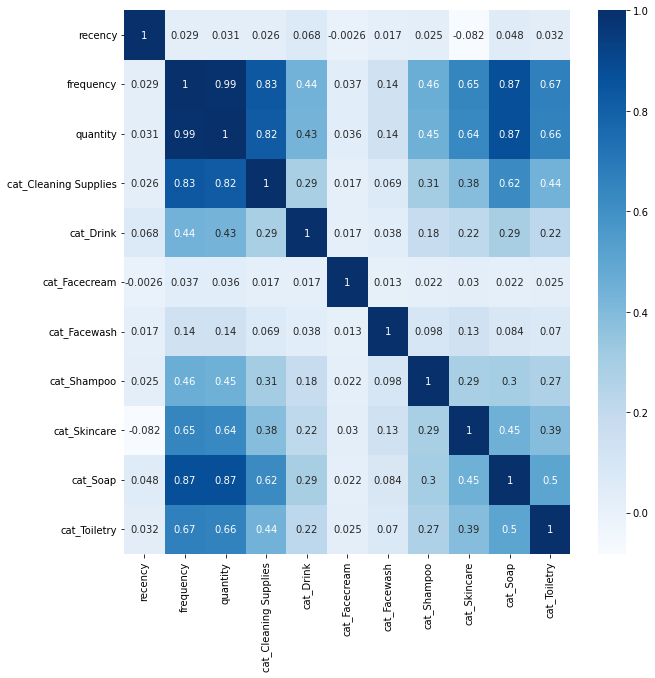

In [111]:
# Look at the correlation between variables
fig = plt.figure(figsize=(10,10))
corr_matrix = data_aggregated.corr()
sns.heatmap(corr_matrix, cmap= "Blues", annot = True)
plt.show()

- Frequency and quantity are highly correlated. We are goind to drop the quantity

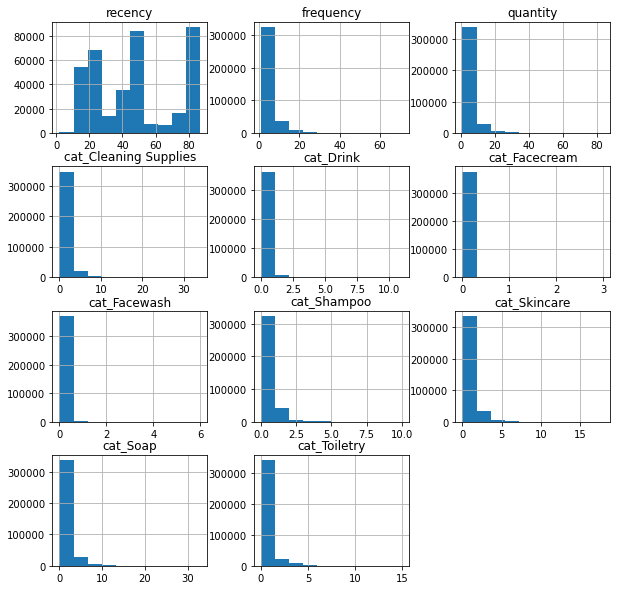

In [112]:
data_aggregated.hist(figsize=(10,10));

All the customers are almost located at the same place. The Distribution of the latitude and the longitude are quite 

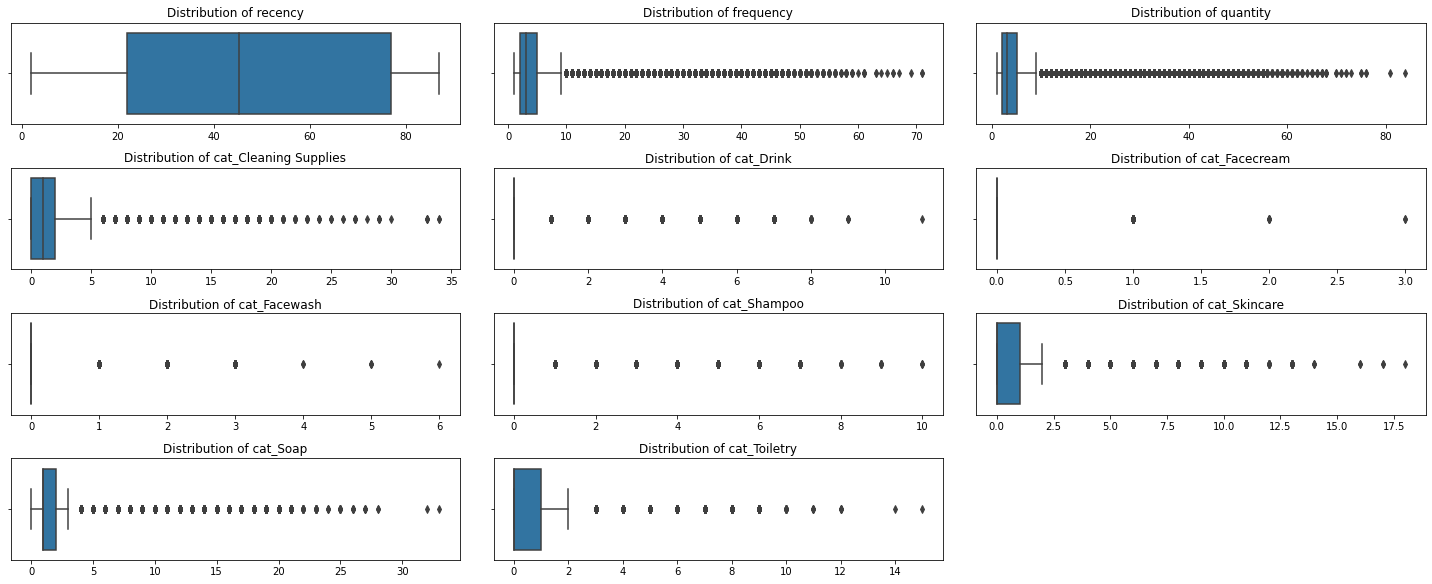

In [113]:
#visualize distribution to detect outliers per column
data_aggregated_continous = data_aggregated.select_dtypes([int,float,"uint8"]) # store all continous variable (integer or float) columns in data_aggregated_continous variable
fig = plt.figure(figsize=(20, 10)) # size of plot

for i, columns in enumerate(data_aggregated_continous.columns, 1): 
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = data_aggregated_continous, x=data_aggregated_continous[columns]) # creates box plots for each feature in data_aggregated_continous dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds title to each subplot
    
plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

We can remove customer being far from the mean latitude and lognitude in the tuning part

In [114]:
data_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374479 entries, 0 to 374478
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   consumer_id            374479 non-null  object 
 1   recency                374479 non-null  float64
 2   frequency              374479 non-null  int64  
 3   quantity               374479 non-null  int64  
 4   age_group              374479 non-null  object 
 5   gender                 374479 non-null  object 
 6   occupation             374479 non-null  object 
 7   cat_Cleaning Supplies  374479 non-null  uint8  
 8   cat_Drink              374479 non-null  uint8  
 9   cat_Facecream          374479 non-null  uint8  
 10  cat_Facewash           374479 non-null  uint8  
 11  cat_Shampoo            374479 non-null  uint8  
 12  cat_Skincare           374479 non-null  uint8  
 13  cat_Soap               374479 non-null  uint8  
 14  cat_Toiletry           374479 non-nu

In [115]:
data_aggregated_cleaned = data_aggregated[["recency", "frequency"]] # We are going to train our algorithm model on recency and frequency features
data_aggregated_cleaned.head()

,recency,frequency
0,85.00,6
1,82.00,2
2,44.25,28
3,42.00,4
4,23.00,2


In [116]:
data_clean = data_aggregated_cleaned.copy()
data_clean.to_csv("data_features_for_ML.cvs")

## Scaling the data

In [117]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_aggregated_cleaned)
data_encoded_scaled = scaler.transform(data_aggregated_cleaned)
print(data_encoded_scaled.mean(axis = 0).round(2))
print(data_encoded_scaled.std(axis = 0).round(2))
print('New std deviation:', data_encoded_scaled.std())
print('New mean:', round(data_encoded_scaled.mean()))

[ 0. -0.]
[1. 1.]
New std deviation: 1.0
New mean: 0


In [118]:
data_encoded_scaled

array([[ 1.51848305,  0.3280431 ],
       [ 1.39880868, -0.52415825],
       [-0.1070938 ,  5.01515053],
       ...,
       [ 0.86027402, -0.09805758],
       [ 1.39880868, -0.09805758],
       [-0.97188358,  0.54109343]])

In [119]:
data_encoded_scaled.shape

(374479, 2)

In [122]:
pd.DataFrame(data_encoded_scaled).to_csv('data_encoded_scaled.csv')